# Statistics and derivatives

## Exercise: Reading simulation data files


In this case we will analyse data produced by a simulation of a spherical cloud interacting with a wind, which is represented by a constant velocity field.


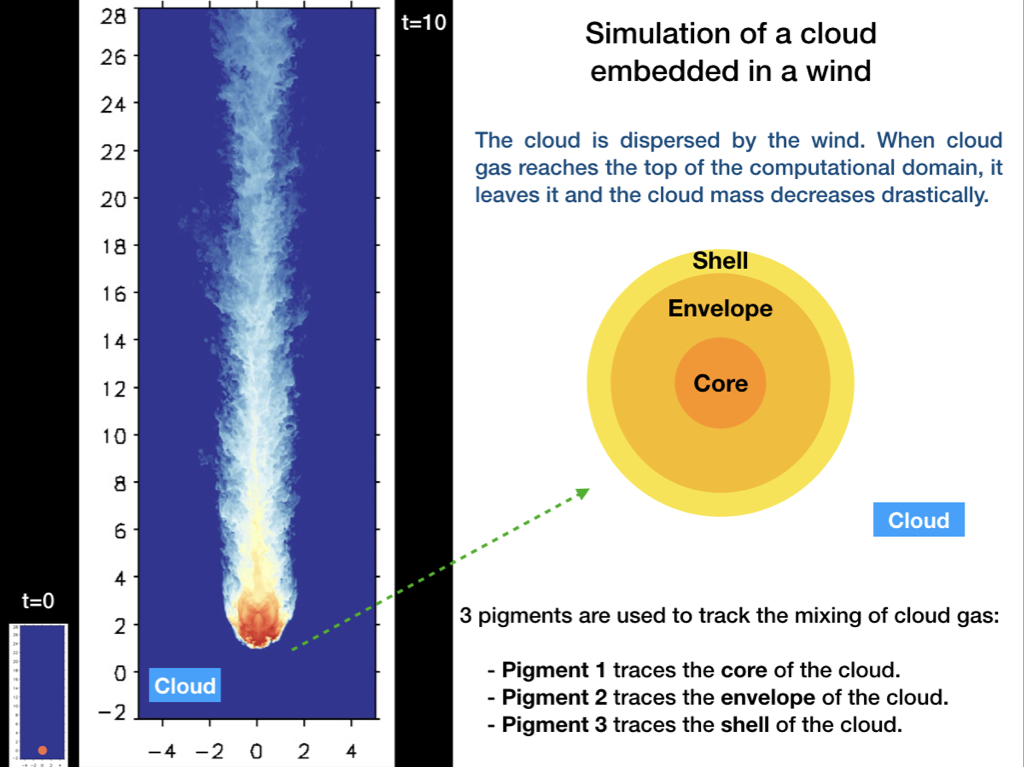


A movie of the simulation can be found here:
https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-1/3Dunifr.mov

The wind disperses the cloud, which becomes elongated like a filament. As the simulation evolves cloud material flows off the computational domain, and towards the end of the simulation, cloud material is almost absent in the domain.

To understant how mass is removed from the cloud, we can calculate some diagnostics, e.g.:

1. The cloud mass inside the computational domain (Mass1)
2. The mass flux of cloud gas crossing half of the simulation domain (FluxE).
3. The mass flux of cloud gas crossing the back side of the simulation domain (FluxH).

The file **data_wind_cloud.dat** contains these quantities, so we are going to do some data analysis.

In [10]:
# Import most-used libraries
import numpy as np
import matplotlib.pyplot as plt

# Importing pandas
import pandas as pd

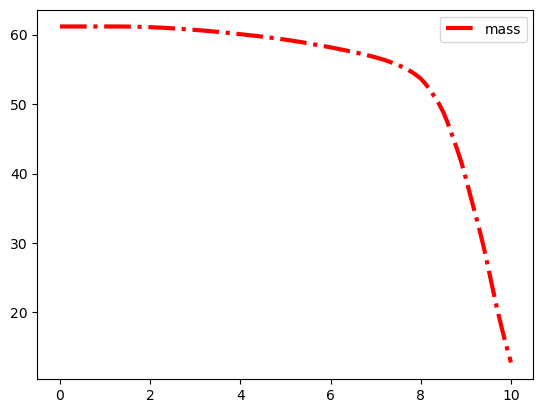

In [13]:
# read_csv returns a DataFrame, which is two-dimensional data structure with labeled axes.

data = pd.read_csv("./sample-data/data_wind_cloud.dat", sep = "\s+")
#print(data) # Uncomment to print data

# To get the data from specific columns, you can use their respective keys, e.g.:

time = data["Time"]
mass = data["Mass1"]
flxh = data["FluxH"]
flxe = data["FluxE"]

# Checking how time looks
#print(time)

# What is the data type? Turns out pandas has its own called core.series.
#print(type(time))

# And now we plot
fig, ax = plt.subplots()

ax.plot(time,mass,color='red', linestyle="-.", linewidth=3, label="mass") # Matplotlib understands the pandas format!
ax.legend()

plt.show()

# Note that it is interesting that the mass drops dramatically at the end
# The reason for this drop is that most of the cloud material leaves the domain after t~8

## Computing statistical parameters


- Numpy comes with a full set of functions to calculate statistical parameters.


- Let's calculate the time average and standard deviation of the mass.

In [14]:
mean_mass = np.mean(mass)

stdv_mass = np.std(mass)

print("The time average of the cloud mass is: {:.2e}".format(mean_mass))
print("The standard deviation of the cloud mass is: {:.2e}".format(stdv_mass))

The time average of the cloud mass is: 5.47e+01
The standard deviation of the cloud mass is: 1.11e+01


## Mass fluxes:

The data file I shared with you also has two additional variables "flxh" and "flxe", which represent the mass of cloud gas crossing the half-plane and the end-plane of the simulation domain, see the figure below:

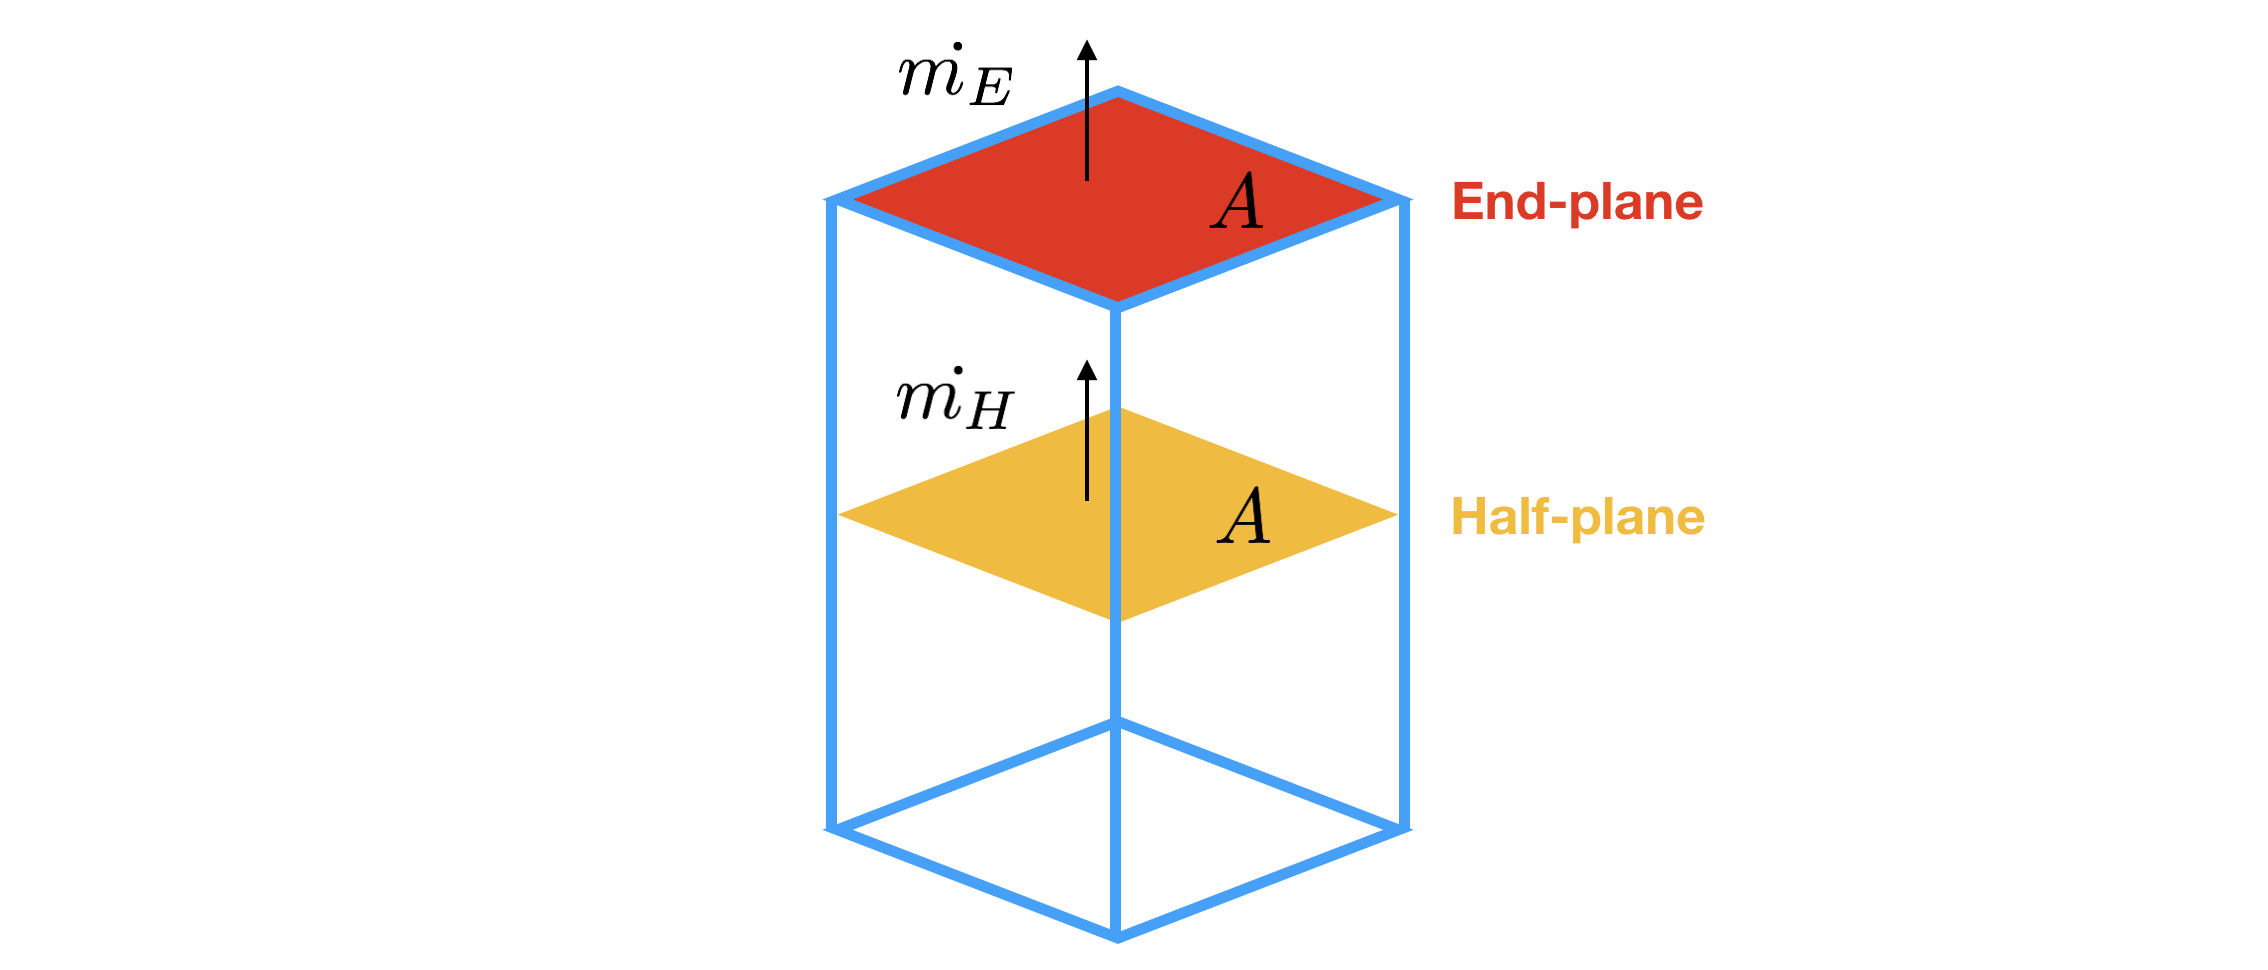


We can plot the mass fluxes. Recall that the mass flux in each cell is in units of mass per unit time per unit area:

$f_m=\frac{dm}{dt\,dA}$, and since all cells in the simulation have the same volume, $A$ is a constant, so we can calculate the time deriviative of the mass as:

$\dot{m}=\frac{dm}{dt}=f_m\,A$, 

which are calculated across the planes H ("flxh") and E ("flxe"), and now we can plot them:

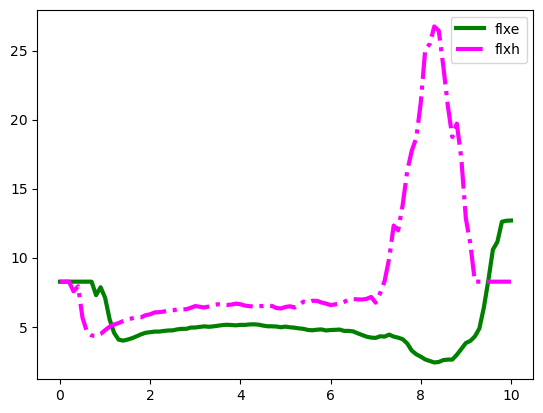

In [15]:
# And we plot:
fig, ax = plt.subplots()

ax.plot(time,flxe,color='green', linestyle="-", linewidth=3, label="flxe")
ax.plot(time,flxh,color='magenta', linestyle="-.", linewidth=3, label="flxh")
ax.legend()
plt.show()


- The sharp increase observed towards the end is due to dense cloud material crossing the planes.


- Similarly, the shift we see is because cloud material crosses the half-plane first and then the end-plane.

## Histograms

Once the variables are read into Python, you can e.g. make histograms of them, e.g. histograms of flxh and flxe.

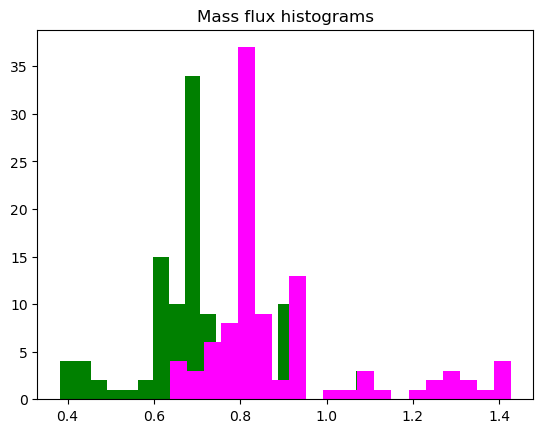

In [16]:
# Note that we can log the values first to highlight the differeces.

plt.figure()

plt.title("Mass flux histograms")
plt.hist(np.log10(flxe), bins=20, color='green')
plt.hist(np.log10(flxh), bins=20, color='magenta')

plt.show()

From which it is very clear that higher mass currents go across the half-plane, compared to the end-plane.

## Derivatives and the finite difference method

Say we want to calculate the cloud mass loss as a function of time, using the data for the cloud mass stored in our data file.

$\dot{m}=\frac{dm}{dt}$

Since we have discrete data, we can approximate the derivatives using **(forward) finite differences**, i.e.,


$\dot{m}\approx\frac{\Delta m}{\Delta t}\Rightarrow \dot{m}=\frac{m_{i+1}-m_i}{t_{i+1}-t_i}+O(\Delta t)$,

or **(backward) finite differences**, i.e.,


$\dot{m}\approx\frac{\Delta m}{\Delta t}\Rightarrow \dot{m}=\frac{m_{i}-m_{i-1}}{t_{i}-t_{i-1}}+O(\Delta t)$, 

where $O(\Delta t)$ is the error, and note that $O(\Delta t)\to 0$ when $\Delta t\to 0$.

Both (forward and backward) finite difference methods are only first order, so it is generally more convenient to use a **(second order) central difference method**, i.e.,


$\dot{m}\approx\frac{\Delta m}{\Delta t}\Rightarrow \dot{m}=\frac{m_{i+1}-m_{i-1}}{t_{i+1}-t_{i-1}}+O(\Delta t^2)$,


which, as you know, comes from the Taylor expansion.

### Forward difference method:


We can use the np.diff() function: https://numpy.org/doc/stable/reference/generated/numpy.diff.html

This function estimates the differences between adyacent numbers in an array.

100


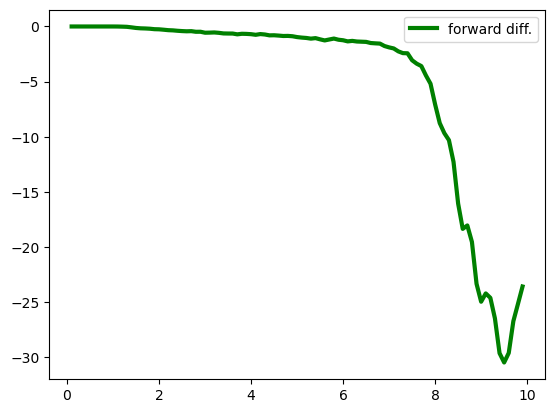

In [17]:
# To see the plot inline
%matplotlib inline

# Derivative calculation
# If we have n values in both arrays, the difference array will have n-1 values.
deriv = np.diff(mass) / np.diff(time)

print(np.size(deriv))

# And the tangents take 2 points into account, so we can take the middle time for plotting.

# To calculate the middle times recursively, we can use:
time2 = (time[:-1] + time[1:]) / 2  
#print(time2)
#print(np.size(time2))

#plt.plot(time2[:-1], deriv, 'r')

# And we plot:
fig, ax = plt.subplots()

ax.plot(time2[:-1],deriv,color='green', linestyle="-", linewidth=3, label="forward diff.")
ax.legend()
plt.show()


### Central difference method:


We can use the np.gradient() function: https://numpy.org/doc/stable/reference/generated/numpy.gradient.html

This function estimates the differences between adyacent numbers, but uses central differences, so it is second order.

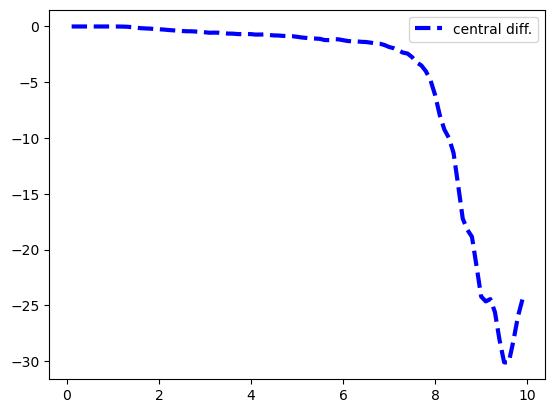

In [18]:
# Please see the documentation above, np.gradient() requires the array and a step as arguments, i.e.:

deriv2 = np.gradient(mass,time[1]-time[0])
# Note that (time[1]-time[0]) is the time difference and in this simulation is fixed.

#print(time[1]-time[0])

#print(np.size(deriv2))

time2 = (time[:-1] + time[1:]) / 2

#print(time2)

#print(np.size(time2))

# And we plot:
fig, ax = plt.subplots()

ax.plot(time2,deriv2,color='blue', linestyle="--", linewidth=3, label="central diff.")
ax.legend()
plt.show()

From which we confirm that second-order methods produce better (more accurate results of the derivatives).

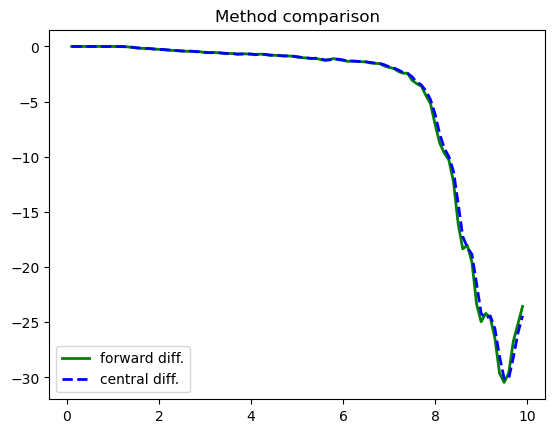

In [19]:
# Let's overplot them:
fig, ax = plt.subplots()

ax.plot(time2[:-1],deriv,color='green', linestyle="-", linewidth=2, label="forward diff.")
ax.plot(time2,deriv2,color='blue', linestyle="--", linewidth=2, label="central diff.")
ax.legend()

plt.title("Method comparison")
plt.show()